In [21]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
%matplotlib inline

In [2]:
dataset = pd.read_csv('fta_req_backups.csv')
dataset.head()

,Required_Prob,system_1,system_2,gate,calculated_prob,required_backups
0,0.400,0.4,0.4,0.0,0.80,4.0
1,0.100,0.4,0.4,1.0,0.16,1.0
2,0.050,0.1,0.1,1.0,0.01,0.0
3,0.200,0.2,0.2,0.0,0.40,2.0
4,0.001,0.4,0.4,1.0,0.16,3.0


In [4]:
dataset.isnull().sum()

Required_Prob       5
system_1            5
system_2            5
gate                5
calculated_prob     5
required_backups    5
dtype: int64

In [9]:
dataset_1 = dataset.dropna()
dataset_1.isnull().sum()

Required_Prob       0
system_1            0
system_2            0
gate                0
calculated_prob     0
required_backups    0
dtype: int64

In [13]:
y = dataset_1['required_backups']
X = dataset_1.drop(columns=['calculated_prob' , 'required_backups'], axis=1)
X.shape, y.shape

((49, 4), (49,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((39, 4), (39,), (10, 4), (10,))

In [15]:
model_1 = LinearRegression()
model_2 = RandomForestRegressor()
model_3 = GradientBoostingRegressor()

In [16]:
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

GradientBoostingRegressor()

In [18]:
y1 = model_1.predict(X_test)
y2 = model_2.predict(X_test)
y3 = model_3.predict(X_test)

In [19]:
print(y_test)

13     8.0
45     7.0
47    22.0
44     2.0
17     3.0
27     5.0
26     6.0
25     8.0
31    31.0
19     2.0
Name: required_backups, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

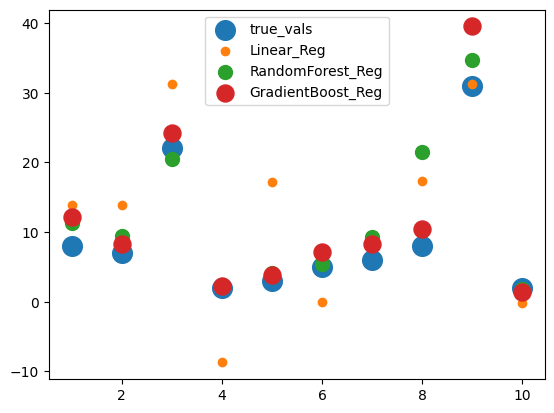

In [27]:
x = [1,2,3,4,5,6,7,8,9,10]
plt.figure()
plt.scatter(x,y_test, s=200, label = 'true_vals')
plt.scatter(x, y1, label = 'Linear_Reg')
plt.scatter(x,y2, label = 'RandomForest_Reg',s=100)
plt.scatter(x,y3, label = 'GradientBoost_Reg', s=150)
plt.legend()
plt.show
